In [135]:
!pip install -q python-dotenv
from dotenv import load_dotenv
load_dotenv("ibm-credentials.env")

True

In [99]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# No more hardcoding credentials here
cos_client = ibm_boto3.client(
    service_name='s3',
    ibm_api_key_id=os.getenv("IBM_IAM_APIKEY"),
    ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
    config=Config(signature_version='oauth'),
    endpoint_url=os.getenv("IBM_COS_ENDPOINT")
)

bucket = 'mlproject1-donotdelete-pr-t6baoel7cak4mt'
object_key = 'Train_data.csv'

body = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType(__iter__, body)

df_1 = pd.read_csv(body)
df_1.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [100]:
import os, types
import pandas as pd
import ibm_boto3
from botocore.client import Config

# Function to load CSV from IBM COS
def load_csv_from_ibm_cos(bucket_name, object_key):
    def __iter__(self): return 0  # needed for COS body

    cos_client = ibm_boto3.client(
        service_name='s3',
        ibm_api_key_id=os.getenv("IBM_IAM_APIKEY"),
        ibm_auth_endpoint="https://iam.cloud.ibm.com/identity/token",
        config=Config(signature_version='oauth'),
        endpoint_url=os.getenv("IBM_COS_ENDPOINT")
    )

    body = cos_client.get_object(Bucket=bucket_name, Key=object_key)['Body']
    if not hasattr(body, "__iter__"):
        body.__iter__ = types.MethodType(__iter__, body)

    return pd.read_csv(body)

df_2 = load_csv_from_ibm_cos(
    bucket_name='mlproject1-donotdelete-pr-t6baoel7cak4mt',
    object_key='Test_data.csv'
)
df_2.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71
5,0,tcp,http,SF,267,14515,0,0,0,0,...,155,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,255,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02
8,0,tcp,http,SF,327,467,0,0,0,0,...,151,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,52,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00


In [101]:
import pandas as pd
import numpy as np

In [102]:
# Summary statistics
df_1.describe()

# Check for class distribution (if classification)
if 'target' in df_1.columns:
    df_1['target'].value_counts()

In [103]:
# Check the basic structure
print("Train Data:")
df_1.info()
print("\nTest Data:")
df_2.info()

# View sample rows
df_1.head()
df_2.head()

# Check for missing values
print("\nMissing values in Train data:")
print(df_1.isnull().sum())

print("\nMissing values in Test data:")
print(df_2.isnull().sum())

Train Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root

In [104]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for column in df_1.columns:
    # Skip 'class' column if it's not in df_2
    if column == 'class' or column not in df_2.columns:
        continue

    if df_1[column].dtype == 'object':
        le = LabelEncoder()
        
        # Combine both for full category coverage
        combined_data = pd.concat([df_1[column], df_2[column]], axis=0)
        le.fit(combined_data)

        df_1[column] = le.transform(df_1[column])
        df_2[column] = le.transform(df_2[column])

        label_encoders[column] = le

In [105]:
# Features and label
X = df_1.drop('class', axis=1)
y = df_1['class']

In [106]:
from sklearn.ensemble import IsolationForest

# Fit the model
iso = IsolationForest(contamination=0.02, random_state=42)  # Adjust contamination if needed
outlier_pred = iso.fit_predict(X)

# Mark outliers
df_1['outlier'] = outlier_pred

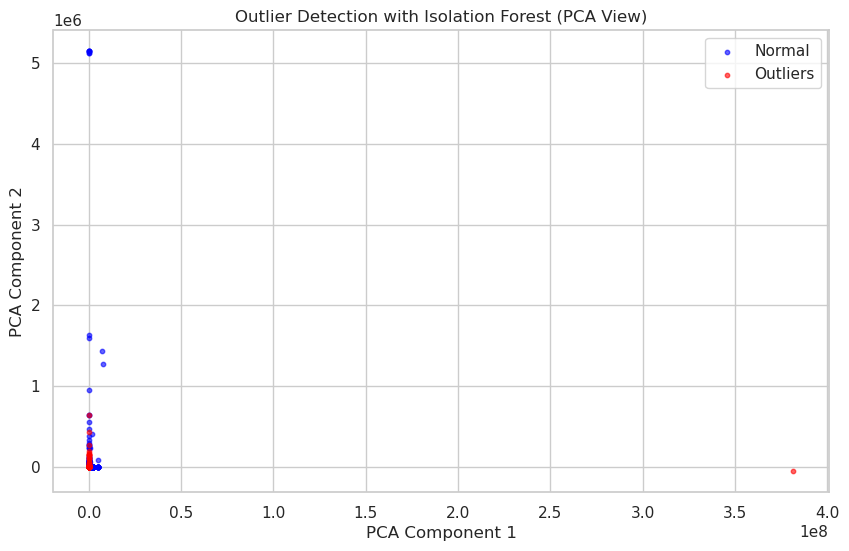

In [107]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[outlier_pred == 1, 0], X_pca[outlier_pred == 1, 1], 
            label="Normal", c='blue', s=10, alpha=0.6)
plt.scatter(X_pca[outlier_pred == -1, 0], X_pca[outlier_pred == -1, 1], 
            label="Outliers", c='red', s=10, alpha=0.6)
plt.legend()
plt.title("Outlier Detection with Isolation Forest (PCA View)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

In [108]:
print("Total outliers detected:", (df_1['outlier'] == -1).sum())

Total outliers detected: 501


In [109]:
# Remove outliers
df_clean = df_1[df_1['outlier'] == 1].drop(columns=['outlier'])

# Separate features and target again
X_train_clean = df_clean.drop('class', axis=1)
y_train_clean = df_clean['class']

print(f"Cleaned training data shape: {X_train_clean.shape}")

Cleaned training data shape: (24691, 41)


In [110]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Ensure X is float64 and converted to NumPy array (to avoid scikit-learn's c_contiguous error)
X_knn = X_train_clean.astype(np.float64).values
y_knn = y_train_clean.values

# Fit KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_knn, y_knn)

# Predict using KNN
y_knn_pred = knn.predict(X_knn)

# Find noise
noise_indices = np.where(y_knn_pred != y_knn)[0]
print(f"Detected {len(noise_indices)} noisy samples")

Detected 176 noisy samples


In [111]:
# Remove noisy samples
X_train_final = np.delete(X_knn, noise_indices, axis=0)
y_train_final = np.delete(y_knn, noise_indices, axis=0)

print(f"Final training data shape: {X_train_final.shape}")

Final training data shape: (24515, 41)


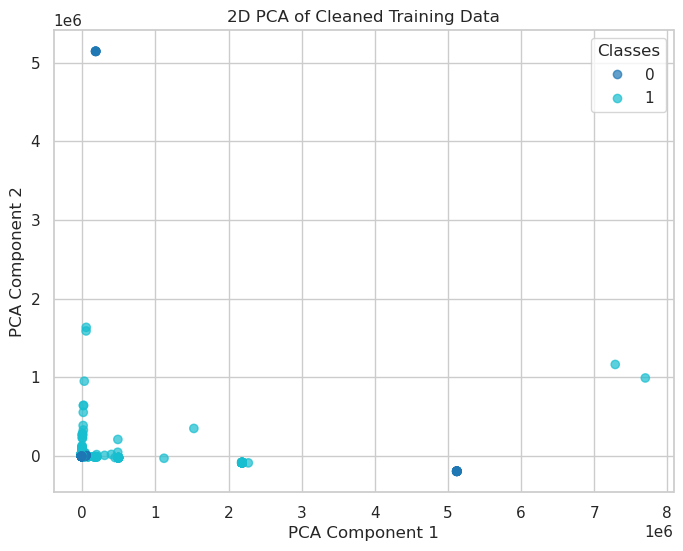

In [112]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Convert labels to numbers
label_encoder = LabelEncoder()
y_numeric = label_encoder.fit_transform(y_train_final)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_final)

# Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='tab10', alpha=0.7)
plt.title("2D PCA of Cleaned Training Data")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(*scatter.legend_elements(), title="Classes")
plt.grid(True)
plt.show()

In [113]:
from sklearn.model_selection import train_test_split

X_train_final_split, X_test_final_split, y_train_final_split, y_test_final_split = train_test_split(
    X_train_final, y_train_final, test_size=0.2, random_state=42, stratify=y_train_final)

In [114]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_final_split, y_train_final_split)

# Predict
y_pred = rf.predict(X_test_final_split)

# Evaluate
print("Accuracy:", accuracy_score(y_test_final_split, y_pred))
print("Classification Report:\n", classification_report(y_test_final_split, y_pred))

Accuracy: 0.9991841729553335
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2249
      normal       1.00      1.00      1.00      2654

    accuracy                           1.00      4903
   macro avg       1.00      1.00      1.00      4903
weighted avg       1.00      1.00      1.00      4903



In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_final_split, y_train_final_split)

# Predict
y_pred_lr = lr_model.predict(X_test_final_split)

# Evaluate
print("🔹 Logistic Regression 🔹")
print("Accuracy:", accuracy_score(y_test_final_split, y_pred_lr))
print("Classification Report:\n", classification_report(y_test_final_split, y_pred_lr))

🔹 Logistic Regression 🔹
Accuracy: 0.8835406893738528
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.91      0.82      0.87      2249
      normal       0.86      0.93      0.90      2654

    accuracy                           0.88      4903
   macro avg       0.89      0.88      0.88      4903
weighted avg       0.89      0.88      0.88      4903



In [116]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_final_split, y_train_final_split)

# Predict
y_pred_dt = dt_model.predict(X_test_final_split)

# Evaluate
print("🔹 Decision Tree 🔹")
print("Accuracy:", accuracy_score(y_test_final_split, y_pred_dt))
print("Classification Report:\n", classification_report(y_test_final_split, y_pred_dt))

🔹 Decision Tree 🔹
Accuracy: 0.9975525188660004
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2249
      normal       1.00      1.00      1.00      2654

    accuracy                           1.00      4903
   macro avg       1.00      1.00      1.00      4903
weighted avg       1.00      1.00      1.00      4903



In [117]:
from sklearn.svm import SVC

# Train
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_final_split, y_train_final_split)

# Predict
y_pred_svm = svm_model.predict(X_test_final_split)

# Evaluate
print("🔹 Support Vector Machine 🔹")
print("Accuracy:", accuracy_score(y_test_final_split, y_pred_svm))
print("Classification Report:\n", classification_report(y_test_final_split, y_pred_svm))

🔹 Support Vector Machine 🔹
Accuracy: 0.7026310422190496
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.61      1.00      0.75      2249
      normal       0.99      0.45      0.62      2654

    accuracy                           0.70      4903
   macro avg       0.80      0.73      0.69      4903
weighted avg       0.82      0.70      0.68      4903



In [118]:
from sklearn.ensemble import GradientBoostingClassifier

# Train
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_final_split, y_train_final_split)

# Predict
y_pred_gb = gb_model.predict(X_test_final_split)

# Evaluate
print("🔹 Gradient Boosting 🔹")
print("Accuracy:", accuracy_score(y_test_final_split, y_pred_gb))
print("Classification Report:\n", classification_report(y_test_final_split, y_pred_gb))

🔹 Gradient Boosting 🔹
Accuracy: 0.9981643891495003
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2249
      normal       1.00      1.00      1.00      2654

    accuracy                           1.00      4903
   macro avg       1.00      1.00      1.00      4903
weighted avg       1.00      1.00      1.00      4903



In [119]:
import pandas as pd

results = {
    "Random Forest": accuracy_score(y_test_final_split, y_pred),
    "Decision Tree": accuracy_score(y_test_final_split, y_pred_dt),
    "SVM": accuracy_score(y_test_final_split, y_pred_svm),
    "Gradient Boosting": accuracy_score(y_test_final_split, y_pred_gb),
    "Logistic Regression": accuracy_score(y_test_final_split, y_pred_lr)
}

results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
print("\n📊 Model Accuracy Comparison:")
print(results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


📊 Model Accuracy Comparison:
                 Model  Accuracy
0        Random Forest  0.999184
1    Gradient Boosting  0.998164
2        Decision Tree  0.997553
3  Logistic Regression  0.883541
4                  SVM  0.702631


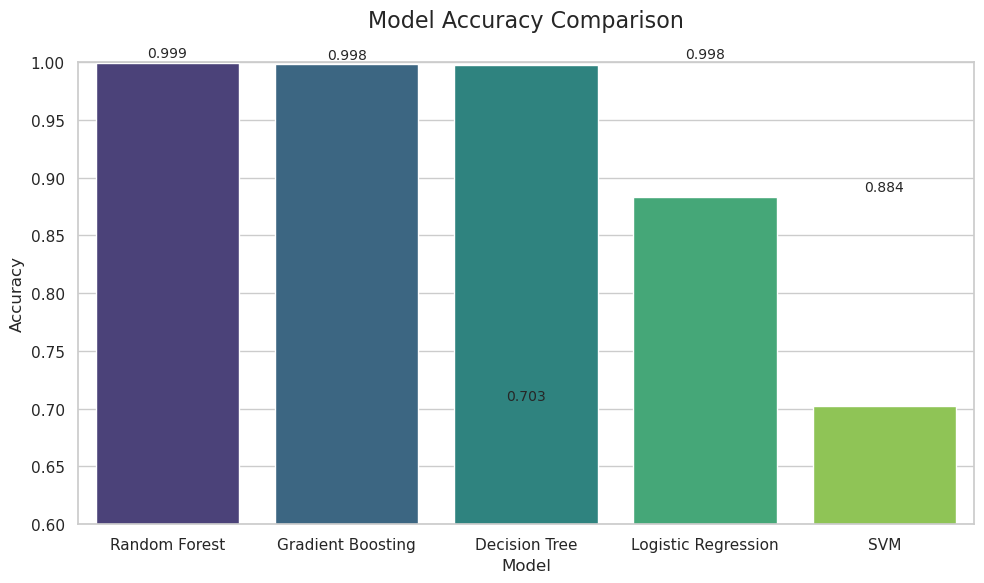

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=results_df.sort_values(by="Accuracy", ascending=False), palette="viridis")

# Labels and title
plt.title("Model Accuracy Comparison\n", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0.6, 1.0)  # to zoom into range of interest

# Add accuracy labels above bars
for index, row in results_df.sort_values(by="Accuracy", ascending=False).iterrows():
    plt.text(index, row.Accuracy + 0.005, f"{row.Accuracy:.3f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

In [121]:
from sklearn.metrics import classification_report
print(classification_report(y_test_final_split, y_pred))

              precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00      2249
      normal       1.00      1.00      1.00      2654

    accuracy                           1.00      4903
   macro avg       1.00      1.00      1.00      4903
weighted avg       1.00      1.00      1.00      4903



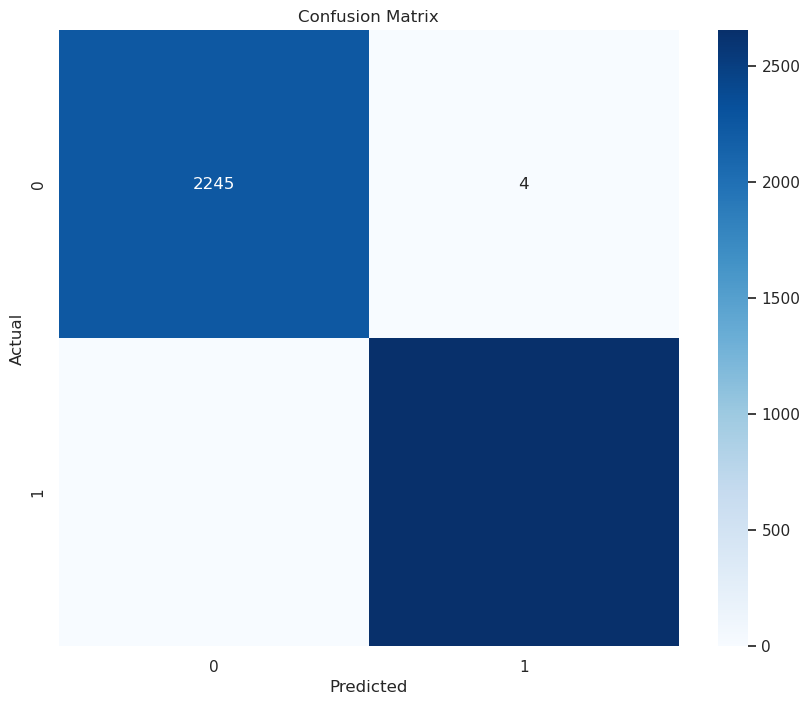

In [122]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_final_split, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [123]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf, X_train_final_split, y_train_final_split, cv=5)
print("Cross-validation scores:", scores)
print("Average CV Score:", scores.mean())

Cross-validation scores: [0.99923528 0.99872547 0.99974503 0.99949006 0.99847017]
Average CV Score: 0.9991331993501108


In [124]:
import joblib

joblib.dump(rf, 'nids_model.pkl')

['nids_model.pkl']

In [144]:
from flask import Flask, request, render_template_string
import joblib
import numpy as np

app = Flask(__name__)
model = joblib.load('nids_model.pkl')

HTML = '''
<!DOCTYPE html>
<html>
<head>
    <title>NIDS Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            background: #f4f7f8;
            color: #333;
            text-align: center;
            padding: 40px;
        }
        h1 {
            color: #4CAF50;
        }
        form {
            background: white;
            max-width: 500px;
            margin: 0 auto;
            padding: 30px;
            border-radius: 10px;
            box-shadow: 0 4px 10px rgba(0,0,0,0.1);
        }
        input[type="text"] {
            width: 90%;
            padding: 10px;
            margin-top: 10px;
            border: 1px solid #ccc;
            border-radius: 5px;
            font-size: 16px;
        }
        input[type="submit"] {
            margin-top: 20px;
            background-color: #4CAF50;
            color: white;
            padding: 10px 25px;
            border: none;
            border-radius: 5px;
            cursor: pointer;
            font-size: 16px;
        }
        input[type="submit"]:hover {
            background-color: #45a049;
        }
        .result {
            margin-top: 20px;
            font-size: 18px;
            color: #333;
        }
        .error {
            color: red;
        }
    </style>
</head>
<body>
    <h1>Network Intrusion Detection System</h1>
    <form action="/predict" method="post">
        <label><strong>Enter comma-separated features:</strong></label><br>
        <input type="text" name="features" placeholder="Example: 0.1,0.5,0.2,..."><br>
        <input type="submit" value="Predict">
    </form>
    {% if prediction_text %}
    <div class="result {{ 'error' if 'Error' in prediction_text else '' }}">
        <strong>{{ prediction_text }}</strong>
    </div>
    {% endif %}
</body>
</html>
'''

@app.route('/')
def home():
    return render_template_string(HTML)

@app.route('/predict', methods=['POST'])
def predict():
    try:
        input_data = request.form['features']
        input_array = np.array([float(i) for i in input_data.split(',')]).reshape(1, -1)
        prediction = model.predict(input_array)[0]
        return render_template_string(HTML, prediction_text=f'Prediction: {prediction}')
    except Exception as e:
        return render_template_string(HTML, prediction_text=f'Error: {str(e)}')

import threading

def run_flask():
    app.run(port=5054, debug=False, use_reloader=False)

# Run Flask in a separate thread
threading.Thread(target=run_flask).start()

 * Serving Flask app '__main__'


In [145]:
!pip install flask pyngrok

In [146]:
from pyngrok import conf
import os

conf.get_default().auth_token = os.getenv("NGROK_AUTH_TOKEN")

In [147]:
from pyngrok import ngrok
import threading

# Kill all existing tunnels
ngrok.kill()

public_url = ngrok.connect(5054)
print("Public URL:", public_url)

# Run Flask app in a thread
def run_app():
    app.run(port=5054, debug=False, use_reloader=False)

thread = threading.Thread(target=run_app)
thread.start()

Public URL: NgrokTunnel: "https://c7ec54b02ccb.ngrok-free.app" -> "http://localhost:5054"
 * Serving Flask app '__main__'
 * Debug mode: off
